In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#fashion mnist data 
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(training_images.shape)     #60k training images
print(training_labels.shape)     
print(test_images.shape)         #10k test images
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


7


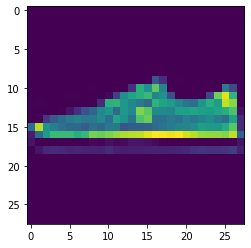

In [ ]:
plt.imshow(training_images[14])
print(training_labels[14])

In [ ]:
#normalizing the training set and test set
training_images = training_images/255
test_images = test_images/255

In [ ]:
#model specification -> One Hidden Layer with ReLU followed by output layer with Softmax
model = keras.models.Sequential([keras.layers.Flatten(), 
                                 keras.layers.Dense(units=1024, activation=tf.nn.relu),
                                 keras.layers.Dense(units=10, activation=tf.nn.softmax)])

In [ ]:
#Optimizer: Adam, Loss Function: Cross-entropy loss
model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
#code that stops training once the model reaches desired performance
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached desired performance, so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#training the model
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3875 - accuracy: 0.8622
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3757 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3668 - accuracy: 0.8694
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3577 - accuracy: 0.8734
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3496 - accuracy: 0.8741


In [31]:
#test set performance
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3862 - accuracy: 0.8619


[0.38623541593551636, 0.8618999719619751]

In [32]:
#model predictions
predictions = model.predict(test_images)

In [33]:
random_test_image = 45
print(np.argmax(predictions[random_test_image]))

7


7


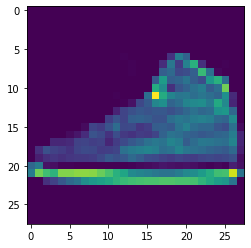

In [34]:
print(test_labels[random_test_image])
plt.imshow(test_images[random_test_image])